In [33]:
import plotly.graph_objects as go
import plotly.io as pio

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("data/traspvh_hasta_marzo.csv", sep=";")
df.head()

,TREJERCI,TRFECINS,TRFE1MAT,TRFEPRIN,TRVTIPVE,TRCONSTR,TRUTILIZ,TRVPRUEB,TRVPROSE,TRVRESUL
0,2021,2021-02-08,2004-12-22,NaN,TURISMO,TURISMO,SIN ESPECIFICAR,DIESEL,PRIMERA,DESFAVORABLE (ALGUN GRAVE)
1,2021,2021-02-08,2004-12-22,2022-02-08,TURISMO,TURISMO,SIN ESPECIFICAR,SIN PRUEBA,SEGUNDA Y SUCESIVAS,FAVORABLE SIN DEFECTOS
2,2021,2021-03-02,2006-04-28,NaN,TURISMO,TURISMO,SIN ESPECIFICAR,GASOLINA CON CATALIZAR,PRIMERA,DESFAVORABLE (ALGUN GRAVE)
3,2021,2021-03-15,2008-02-29,2022-03-16,TURISMO,TURISMO,SIN ESPECIFICAR,DIESEL,PRIMERA,FAVORABLE SIN DEFECTOS
4,2021,2021-03-25,2003-03-26,2022-03-25,TURISMO,TURISMO,SIN ESPECIFICAR,GASOLINA CON CATALIZAR,PRIMERA,FAVORABLE SIN DEFECTOS


In [36]:
df.TRVTIPVE.unique()

array(['TURISMO', 'FURGON<=3500 KG', 'CAMION>12000 KG', 'MIXTO',
       'TRACTO-CAMION', 'MOTOCICLETA', 'CAMION<=3500 KG', 'TAXI',
       'AUTOCARAVANA', 'AUTOBUS', '3500 KG<CAMION<12000KG', 'CUADRICICLO',
       'FURGON>3500 KG', 'REMOLQUES Y SEMIRREMOLQUES', 'TRACTOR AGRICOLA',
       'VEHICULO OBRAS', 'CICLOMOTOR', 'REMOLQUE AGRICOLA'], dtype=object)

In [37]:
df.TRVRESUL.unique()

array(['DESFAVORABLE (ALGUN GRAVE)', 'FAVORABLE SIN DEFECTOS',
       'NEGATIVA (ALGUN MUY GRAVE)', 'FAVORABLE CON DEFECTOS LEVES'],
      dtype=object)

In [38]:
df.shape

(573193, 10)

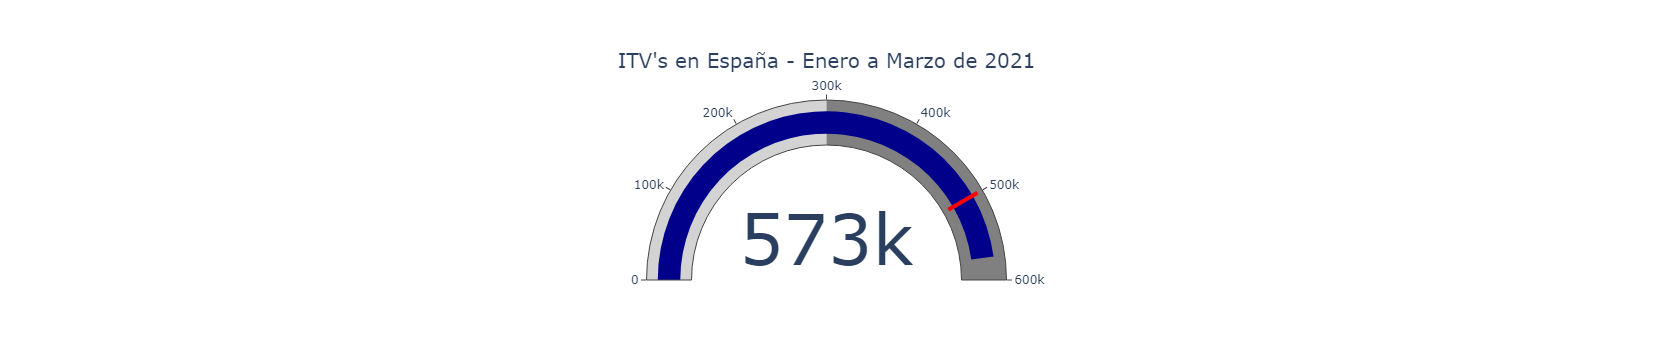

In [39]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=df.shape[0],
    title={'text': "ITV's en España - Enero a Marzo de 2021"},
    gauge={
        'axis': {'range': [0, 600000]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 300000], 'color': "lightgray"},
            {'range': [300000, 600000], 'color': "gray"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 500000
        }
    }
))
fig.write_image("images/gauge_chart.png")
fig.show()

In [40]:
favorables = df.loc[df.TRVRESUL.str.contains("^FAVORABLE", regex=True)]
favorables.head()

,TREJERCI,TRFECINS,TRFE1MAT,TRFEPRIN,TRVTIPVE,TRCONSTR,TRUTILIZ,TRVPRUEB,TRVPROSE,TRVRESUL
1,2021,2021-02-08,2004-12-22,2022-02-08,TURISMO,TURISMO,SIN ESPECIFICAR,SIN PRUEBA,SEGUNDA Y SUCESIVAS,FAVORABLE SIN DEFECTOS
3,2021,2021-03-15,2008-02-29,2022-03-16,TURISMO,TURISMO,SIN ESPECIFICAR,DIESEL,PRIMERA,FAVORABLE SIN DEFECTOS
4,2021,2021-03-25,2003-03-26,2022-03-25,TURISMO,TURISMO,SIN ESPECIFICAR,GASOLINA CON CATALIZAR,PRIMERA,FAVORABLE SIN DEFECTOS
5,2021,2021-03-11,2019-04-24,2023-03-11,FURGON<=3500 KG,FURGON MMA<= 3500 KG,CAJA CERRADA,DIESEL,PRIMERA,FAVORABLE SIN DEFECTOS
6,2021,2021-01-29,2006-05-02,2021-07-29,CAMION>12000 KG,CAMION > 12000K,CAJA ABIERTA,DIESEL,PRIMERA,FAVORABLE SIN DEFECTOS


In [41]:
porcentaje_favorables = favorables.shape[0] / df.shape[0] * 100
porcentaje_favorables

88.7430586207438

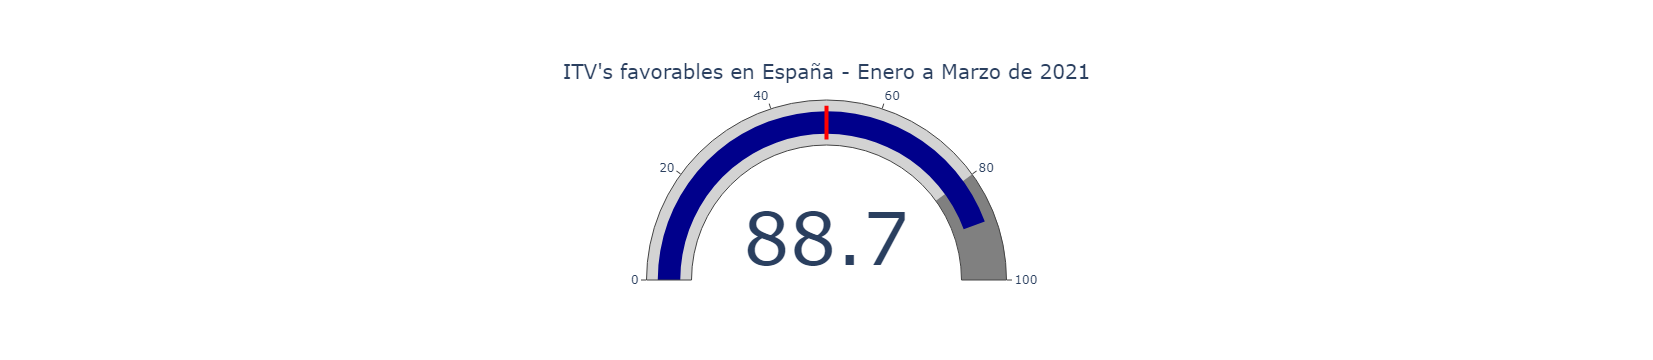

In [42]:
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=porcentaje_favorables,
    title={'text': "ITV's favorables en España - Enero a Marzo de 2021"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 80], 'color': "lightgray"},
            {'range': [80, 100], 'color': "gray"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 50
        }
    }
))
fig.write_image("images/gauge_chart_2.png")
fig.show()